# Entrenamiento del dataset mnist
* Clasificación de un problema de escritura con **MNIST dataset** [^1]
* Cargamos el dataset importando con *mnist.load_data()*

![MNIST example](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png) Source: Wikipedia.


[^1]: https://en.wikipedia.org/wiki/MNIST_database

# Ejercicio
* Creación de nueva red neuronal y su evaluación para el dataset MNIST

![CNN example](https://drive.google.com/uc?id=1dpyEYquPdWkl8cFbvECYP87bYgpamGq9)

In [1]:
import tensorflow as tf

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


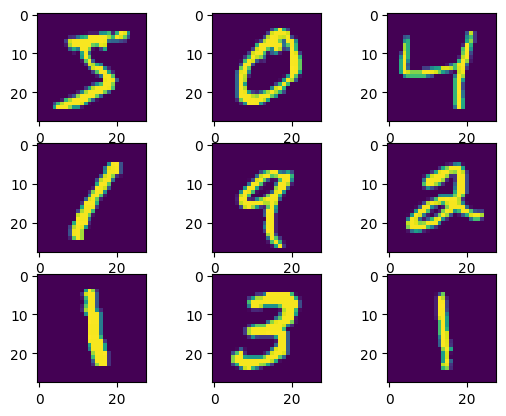

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

In [4]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(img_rows, img_cols,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))  # Let's try to avoid overfitting...
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo creado
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        48,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,933 (234.11 KB)

 Trainable params: 59,933 (234.11 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
epochs = 10
batch_size = 128

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8030 - loss: 0.6473 - val_accuracy: 0.9711 - val_loss: 0.0893
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9699 - loss: 0.0994 - val_accuracy: 0.9834 - val_loss: 0.0481
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9776 - loss: 0.0686 - val_accuracy: 0.9872 - val_loss: 0.0354
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9820 - loss: 0.0540 - val_accuracy: 0.9895 - val_loss: 0.0312
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9859 - loss: 0.0444 - val_accuracy: 0.9904 - val_loss: 0.0291
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.0373 - val_accuracy: 0.9912 - val_loss: 0.0273
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9885 - loss: 0.0347 - val_accuracy: 0.9918 - val_loss: 0.0254
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9896 - loss: 0.0317 - val_accuracy: 

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03668421506881714
Test accuracy: 0.9890000224113464


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


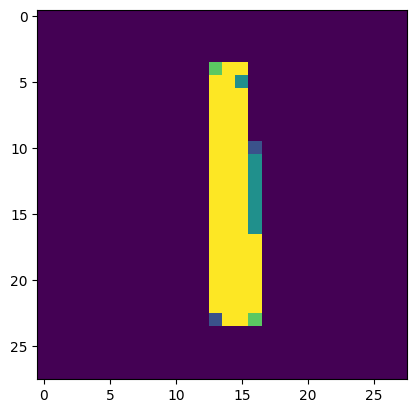

Predicted: 1; Exact label: 1


In [21]:
import random
import numpy as np

id_random = random.randint(0,x_test.shape[0])

test_im = x_test[id_random]

pred = model.predict(test_im.reshape(1,img_rows, img_cols), batch_size=1, verbose=1)

imgplot = plt.imshow(test_im)
plt.show()
print("Predicted: "+str(np.argmax(pred))+"; Exact label: "+str(np.argmax(y_test[id_random])))